In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

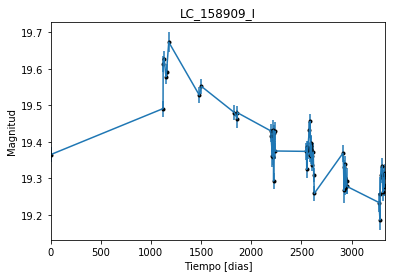

In [2]:
data = np.genfromtxt('LC_158909_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_158909_I')
plt.savefig("LC_158909_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

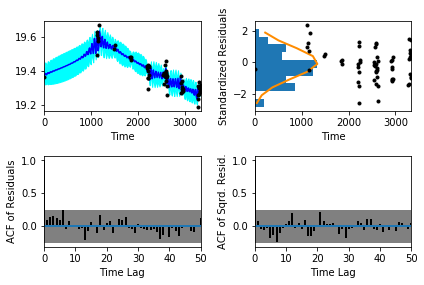

In [5]:
sample.assess_fit()

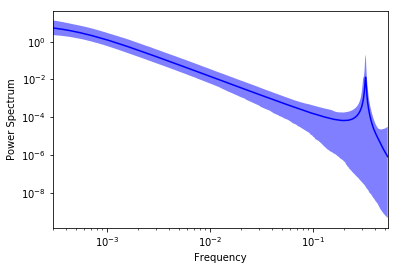

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

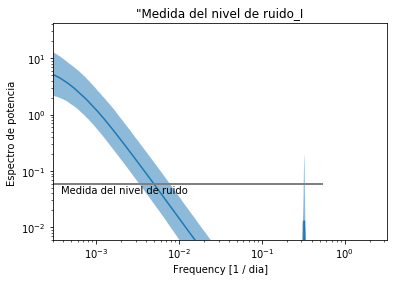

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_158909_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_158909_I')

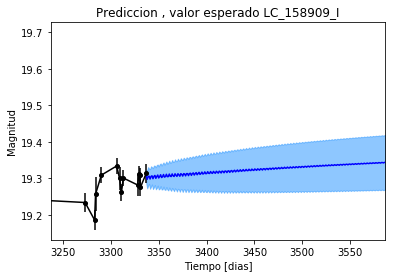

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_158909_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_158909_I')

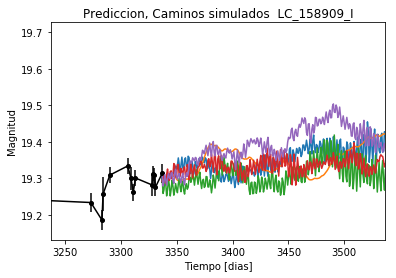

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_158909_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


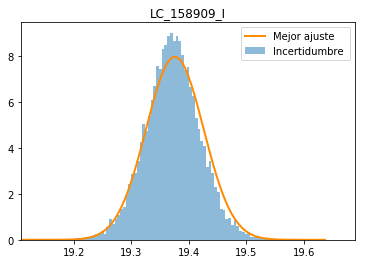

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_158909_I')
plt.savefig("Mejor_ajuste_LC_158909_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_158909_I')

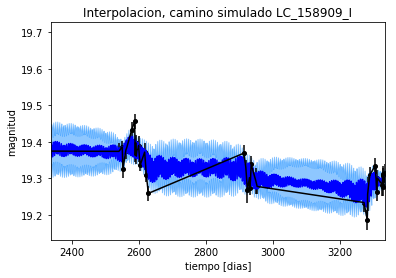

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_I')

Text(0.5,1,'Interpolacion, camino simulado LC_158909_I')

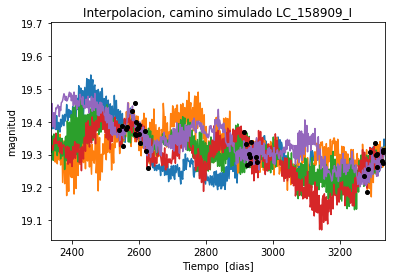

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 313.392869929
Median: 0.00205505090284
Standard deviation: 0.0560947414616
68% credibility interval: [ 0.00081195  0.00461517]
95% credibility interval: [ 0.00038087  0.01683294]
99% credibility interval: [  3.12086797e-04   3.88560224e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 361.737571447
Median: 0.00204478329965
Standard deviation: 0.0416713169022
68% credibility interval: [ 0.00079925  0.00456794]
95% credibility interval: [ 0.00037308  0.01285166]
99% credibility interval: [ 0.00031209  0.10975557]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 265.320980353
Median: 0.490000556988
Standard deviation: 0.297092

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 103.700631617
Median: 133.232825294
Standard deviation: 3.0913725272
68% credibility interval: [ 130.19017145  135.17439035]
95% credibility interval: [ 123.92986932  136.38221199]
99% credibility interval: [ 121.3769445   136.83233031]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 196.949802799
Median: 3.14917419028
Standard deviation: 1.89966345726
68% credibility interval: [ 1.0530768   5.31544693]
95% credibility interval: [ 0.09228038  6.54735361]
99% credibility interval: [ 0.04100447  6.73160903]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 231.450827003
Median: 4.25943293439
Standard deviation: 5.27654844535
68% credibility interval: [ 4.1378669   4.57516362]
95% credibility interval: [  0.91328651  18.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 4.78117825759e-46
Standard deviation: 1.76478676209e+69
68% credibility interval: [  3.22075849e-51   1.30150734e-10]
95% credibility interval: [  1.51261030e-73   8.01944020e+00]
99% credibility interval: [  6.28323450e-153   1.55170413e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1458.30693875
Median: 19.4094346029
Standard deviation: 0.0517214137511
68% credibility interval: [ 19.35826311  19.45883456]
95% credibility interval: [ 19.30199313  19.50940194]
99% credibility interval: [ 19.27331243  19.54666565]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 199.121271625
Median: 0.324921416881
Standard deviation: 0.128177403625
68% credibility interval: [ 0.32017086  0.33054247]
95% credibility interval: [ 0.12999355  0.68603256]
99% credibility interval: [ 0.          0.74739222]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 199.121271625
Median: 0.324921416881
Standard deviation: 0.128177403625
68% credibility interval: [ 0.32017086  0.33054247]
95% credibility interval: [ 0.12999355  0.68603256]
99% credibility interval: [ 0.          0.74739222]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3220.85790852
Median: 0.0
Standard deviation: 4.82968558039e-05
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 103.700631617
Median: 133.232825294
Standard deviation: 3.0913725272
68% credibility interval: [ 130.19017145  135.17439035]
95% credibility interval: [ 123.92986932  136.38221199]
99% credibility interval: [ 121.3769445   136.83233031]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 495.761834978
Median: 0.0114919625001
Standard deviation: 0.00555007179327
68% credibility interval: [ 0.00803225  0.01694859]
95% credibility interval: [ 0.00584506  0.02551622]
99% credibility interval: [ 0.00469558  0.03895305]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 263.741501111
Median: 1.03629584234
Standard deviation: 0.236932031113
68% credibility interval: [ 0.84984666  1.28862624]
95% credibility interval: [ 0.70191104  1.65904652]
99% credibility interval: [ 0.63380242  1.85034832]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 159.915420915
Median: 0.0988809348774
Standard deviation: 0.168145233327
68% credibility interval: [ 0.02968985  0.19019555]
95% credibility interval: [ 0.0013291   0.68656625]
99% credibility interval: [  1.52813032e-04   1.04499913e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 313.392869929
Median: (-0.0129122656382-2.04714052447j)
Standard deviation: 0.879108719644
68% credibility interval: [-0.02899798-2.06427812j -0.00510164-2.03098628j]
95% credibility interval: [-0.10576449-0.24514822j -0.00239307-2.01944846j]
99% credibility interval: [ -2.44139589e+00-4.51297271j  -1.96089918e-03-2.04014883j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 361.737571447
Median: (-0.0128477523847+2.01454782651j)
Standard deviation: 0.846854639677
68% credibility interval: [-0.02870121+2.32137597j -0.00502185+2.05039831j]
95% credibility interval: [-0.08074933+1.44206084j -0.00234416+2.05853005j]
99% credibility interval: [-0.68961458+0.j         -0.00196090+2.04014883j]
Posterior summary for parameter 